In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [31]:
df = pd.read_csv('sample_data/AmesHousing.csv')

print("Shape :", df.shape)
df.head()

Shape : (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [33]:
df.isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [34]:
threshold  = len(df) * 0.3
df = df.dropna(thresh = threshold, axis = 1)

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

<ipython-input-34-e2009e7bdff4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].median())
<ipython-input-34-e2009e7bdff4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [35]:
df.isnull().sum()


,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [13]:
df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded.shape

(2930, 252)

In [36]:
X = df_encoded.drop('SalePrice', axis = 1)
Y = df_encoded['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2344, 251)
(586, 251)


In [37]:
model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


RMSE: 29152.88
R2: 0.89


In [38]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(Y_test, ridge_pred))
ridge_r2 = r2_score(Y_test, ridge_pred)

print(f"RidgeRMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}")

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(Y_test, lasso_pred))
lasso_r2 = r2_score(Y_test, lasso_pred)

print(f"LassoRMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.34704e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RidgeRMSE: 29350.39, R²: 0.89
LassoRMSE: 28904.22, R²: 0.90


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.260e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


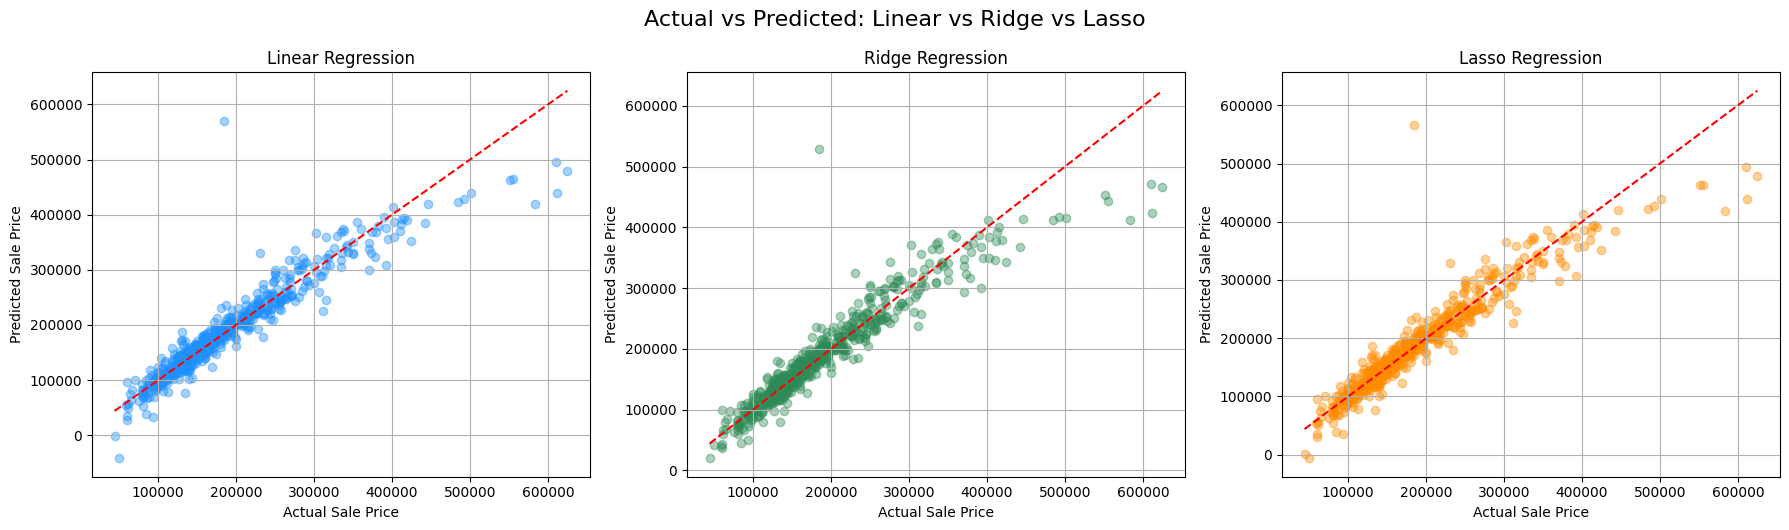

In [39]:
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(Y_test, y_pred, alpha=0.4, color='dodgerblue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Linear Regression")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.grid(True)

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(Y_test, ridge_pred, alpha=0.4, color='seagreen')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Ridge Regression")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.grid(True)

# Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(Y_test, lasso_pred, alpha=0.4, color='darkorange')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Lasso Regression")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.grid(True)

plt.tight_layout()
plt.suptitle("Actual vs Predicted: Linear vs Ridge vs Lasso", fontsize=16, y=1.05)
plt.show()
